In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
# Read CSV
df = pd.read_csv('191402059_Michael_CSV.csv')

In [3]:
# Show data
df['Diabetes']=df.Diabetes.replace({'Normal':0,'Diabetic':1})
df.head()

,PatientId,Zone,State,District,Age,Gender,Waist,Height,Weight,DiabetesSelfDecl,...,BmiWcRiskScore,IdrsWaist,IdrsAge,IdrsFamilyHistory,IdrsBmi,IdrsBmiWc,IdrsPhysicalActivity,Idrs,IdrsWithBmi,IdrsWithBmiWc
0,0,W,Rajasthan,Ajmer,35,Female,70,157,47,Normal,...,1,0,20,0,0,0,30,50,50,50
1,1,E,Orissa,Balasore,38,Female,81,145,65,Normal,...,4,10,20,10,20,30,30,70,80,90
2,4,W,Rajasthan,Ajmer,42,Female,102,159,68,Normal,...,3,20,20,20,10,20,30,90,80,90
3,7,E,Orissa,Balasore,37,Female,76,142,44,Normal,...,1,0,20,10,0,0,30,60,60,60
4,8,E,Orissa,Balasore,47,Male,87,160,60,Normal,...,2,0,20,10,10,10,30,60,70,70


In [4]:
# Show columns
df.columns

Index(['PatientId', 'Zone', 'State', 'District', 'Age', 'Gender', 'Waist',
       'Height', 'Weight', 'DiabetesSelfDecl', 'Diafather', 'Diamother',
       'Moderate', 'Vigorous', 'Dailyphysical', 'Hba1c', 'DiabetesCalc',
       'Diabetes', 'ClinicalNotes', 'Bmi', 'WcRiskScore', 'BmiRiskScore',
       'BmiWcRiskScore', 'IdrsWaist', 'IdrsAge', 'IdrsFamilyHistory',
       'IdrsBmi', 'IdrsBmiWc', 'IdrsPhysicalActivity', 'Idrs', 'IdrsWithBmi',
       'IdrsWithBmiWc'],
      dtype='object')

In [5]:
# Smaller Dataframe
keep = ['Gender','Age','Weight','Diabetes','Diafather','Diamother']
db = df[keep].dropna()
db.head(10)

,Gender,Age,Weight,Diabetes,Diafather,Diamother
0,Female,35,47,0,0,0
1,Female,38,65,0,1,0
2,Female,42,68,0,1,1
3,Female,37,44,0,1,0
4,Male,47,60,1,1,0
5,Female,59,57,0,0,0
6,Female,30,84,0,1,0
7,Female,37,60,0,1,0
8,Female,32,65,0,1,0
9,Male,43,65,1,0,1


In [6]:
# Linear Regression And Interpretation
# Only Weight Factor
model = sm.OLS.from_formula("Diabetes ~ Weight", data=db)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     37.62
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           9.02e-10
Time:                        23:57:31   Log-Likelihood:                -5300.4
No. Observations:                7496   AIC:                         1.060e+04
Df Residuals:                    7494   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2227      0.031      7.142      0.000       0.162       0.284
Weight         0.0029      0.000      6.134      0.000       0.002       0.004
==============================================================================
Omnibus:                    28677.327   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.304
Skew:                           0.360   Prob(JB):                    6.96e-268
Kurtosis:                       1.150   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Standar Deviation
db.Diabetes.std()

0.49200321032172295

In [8]:
#Correlation
cc=db[["Diabetes","Weight"]].corr()
cc

,Diabetes,Weight
Diabetes,1.000000,0.070678
Weight,0.070678,1.000000


In [9]:
# R-Squared Value
cc.Diabetes.Weight**2

0.004995439014038608

In [10]:
# Predicted Diabetes Value based on Factor
result.fittedvalues

0       0.357067
1       0.408533
2       0.417110
3       0.348490
4       0.394237
          ...   
7491    0.388518
7492    0.414251
7493    0.411392
7494    0.448562
7495    0.385659
Length: 7496, dtype: float64

In [11]:
# Linear Regression And Interpretation
# Age,Gender,Weight,DiabeticFather And DiabeticMother Factor
model = sm.OLS.from_formula("Diabetes ~ Age + Gender + Weight + Diafather + Diamother", data=db)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     219.8
Date:                Thu, 15 Apr 2021   Prob (F-statistic):          1.54e-219
Time:                        23:57:31   Log-Likelihood:                -4806.0
No. Observations:                7496   AIC:                             9624.
Df Residuals:                    7490   BIC:                             9665.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3238      0.036     -8.919      0.000      -0.395      -0.253
Gender[T.Male]     0.0337      0.011      3.038      0.002       0.012       0.055
Age                0.0117      0.000     25.715      0.000       0.011       0.013
Weight             0.0014      0.000      3.131      0.002       0.001       0.002
Diafather          0.1795      0.014     12.408      0.000       0.151       0.208
Diamother          0.1986      0.015     13.039      0.000       0.169       0.228
==============================================================================
Omnibus:                    59861.897   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.104
Skew:                           0.277   Prob(JB):                    3.90e-160
Kurtosis:                       1.570   Cond. No.                         566.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Standar Deviation
db.Diabetes.std()

0.49200321032172295

In [13]:
# Correlation
cc=db[["Diabetes","Weight","Diafather","Diamother"]].corr()
cc

,Diabetes,Weight,Diafather,Diamother
Diabetes,1.000000,0.070678,0.150129,0.170416
Weight,0.070678,1.000000,0.050173,0.084011
Diafather,0.150129,0.050173,1.000000,0.212706
Diamother,0.170416,0.084011,0.212706,1.000000


In [14]:
# # R-Squared Value
# cc.Diabetes.Weight**2

In [15]:
# Predicted Diabetes Value based on Factor
result.fittedvalues

0       0.151141
1       0.391112
2       0.640675
3       0.349720
4       0.522761
          ...   
7491    0.447037
7492    0.474319
7493    0.811581
7494    0.654929
7495    0.317006
Length: 7496, dtype: float64

In [16]:
# Visualization

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


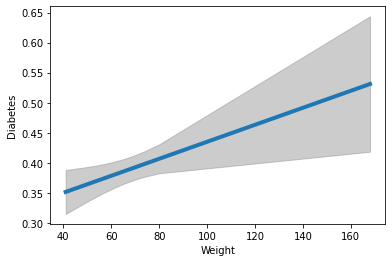

In [17]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"Diafather": 0, "Diamother": 0, "Gender":"Male", "Age":50}
pr, cb, fv = predict_functional(result, "Weight",values=values, ci_method="simultaneous")
#Here, pr is the predicted values(pr), cb is the confidence band and 
#the fv is the function values
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Weight")
_ = ax.set_ylabel("Diabetes")

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


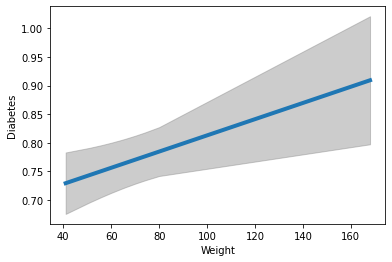

In [18]:
values["Diafather"]=1
values["Diamother"]=1
pr, cb, fv = predict_functional(result, "Weight",values=values, ci_method="simultaneous")
#Here, pr is the predicted values(pr), cb is the confidence band and 
#the fv is the function values
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Weight")
_ = ax.set_ylabel("Diabetes")

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


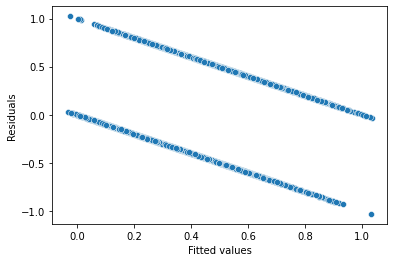

In [19]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

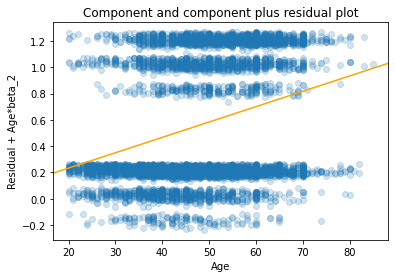

In [20]:
from statsmodels.graphics.regressionplots import plot_ccpr
ax = plt.axes()
plot_ccpr(result, "Age", ax)
ax.lines[0].set_alpha(0.2) 
# Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

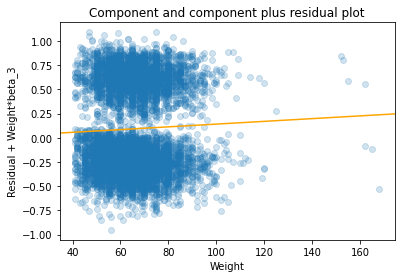

In [21]:
from statsmodels.graphics.regressionplots import plot_ccpr
ax = plt.axes()
plot_ccpr(result, "Weight", ax)
ax.lines[0].set_alpha(0.2) 
# Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')